In [53]:
from PIL import Image
import pytesseract
import cv2
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

#pytesseract.pytesseract.tesseract_cmd = r'D:\Dev\envs\py36\Library\bin\tesseract.exe'
#!tesseract --list-langs

In [41]:
text_from_image = pytesseract.image_to_string(Image.open('ticket_inter_20230222_crop.jpg'))
print(text_from_image)

Intermarché

SAS BEAUROCHAY

15 COURS DE L'ANCIENNE

BOULANGERTE
92130 ISSY LES MOULINEAUX
TEL : 01 46 62 49 80

NESTLE CHOCAPIC 750G 3,55 EUR A
NESTLE CHOCAPIC 750G 3,55 EUR A
NESTLE CHOCAPIC 750G 3,55 EUR A
CASSEGRAIN P.P CAROT pr,
JR HALOPAC 2TR.COEUR 2
3,

64 EUR A
CORAYA 10 BAT |LANGOU 50 EUR A
*xAXE DEO DARK TEMPTA 6,45 EUR B
ST ELOI CROUTONS NAT 1,07 EUR A
LIEBIG VEL 12LEG RED 2,60 EUR A
LIEBIG VEL 12LEG RED 2,60 EUR A
NIVEA DEMAQUILL YEUX 7

MONTANT DU
, a

CB SANS CONTACT 34,97, EUR




# OpenCV image preprocessing - contrast_optimizer.py

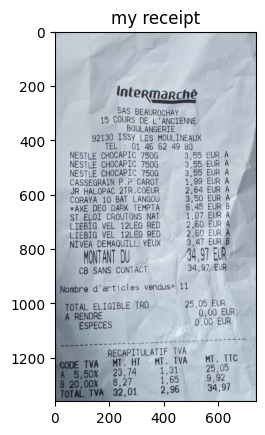

In [42]:
img = cv2.imread('ticket_inter_20230222_crop.jpg')

plt.imshow(img)
plt.title('my receipt')
plt.show()

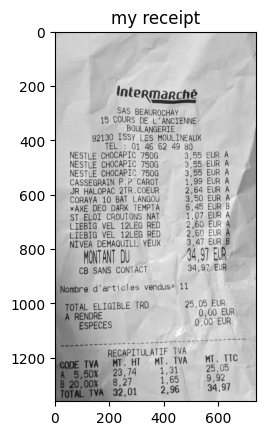

In [43]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #IMREAD_GRAYSCALE

plt.imshow(img_gray, cmap="gray")
plt.title('my receipt')
plt.show()

## Do not enlarge contrast by histogram equalization
maps the input pixels in brighter region to output pixels in full region

In [44]:
"""
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
"""

"\nhist,bins = np.histogram(img.flatten(),256,[0,256])\ncdf = hist.cumsum()\ncdf_normalized = cdf * float(hist.max()) / cdf.max()\nplt.plot(cdf_normalized, color = 'b')\nplt.hist(img.flatten(),256,[0,256], color = 'r')\nplt.xlim([0,256])\nplt.legend(('cdf','histogram'), loc = 'upper left')\nplt.show()\n"

In [45]:
"""
equ = cv2.equalizeHist(img_gray)

plt.imshow(equ, cmap="gray")
plt.title('my receipt')
plt.show()
"""

'\nequ = cv2.equalizeHist(img_gray)\n\nplt.imshow(equ, cmap="gray")\nplt.title(\'my receipt\')\nplt.show()\n'

=> ewww

## Enlarge luminosity and contrast

### By Dynamic/adaptive threshold method

In [46]:
from skimage.filters import threshold_local

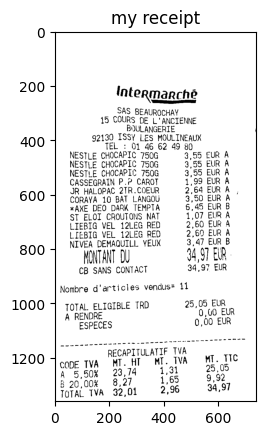

In [47]:
# Dynamic/adaptive Threshold, to grid-search
thresh = threshold_local(img_gray,
                         block_size=51,
                         method="gaussian",
                         offset=40)

img_contr = (img_gray > thresh).astype("uint8") * 255

plt.imshow(img_contr, cmap="gray")
plt.title('my receipt')
plt.show()

### By Increasing light contrast then dark contrast

In [48]:
#img_gray = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

In [49]:
def increase_light_contrast(im, value=30):
    """
    Takes an Image and a threshold value
    Return the processed Image, having light contrast enlarged
    based on https://stackoverflow.com/users/5629538/bill-grates 's answer
    """

    hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img


def increase_dark_contrast(im, value=30):
    """
    Takes an Image and a threshold value
    Return the processed Image, having light contrast enlarged
    based on https://stackoverflow.com/users/5629538/bill-grates 's answer
    """
    
    hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v < lim] = 0

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [50]:
"""
img_light = increase_light_contrast(img_gray, value=130)

plt.imshow(img_light, cmap="gray")
plt.title('my receipt')
plt.show()

img_dark = increase_dark_contrast(img_light, value=100) #100

plt.imshow(img_dark, cmap="gray")
plt.title('my receipt')
plt.show()
"""

'\nimg_light = increase_light_contrast(img_gray, value=130)\n\nplt.imshow(img_light, cmap="gray")\nplt.title(\'my receipt\')\nplt.show()\n\nimg_dark = increase_dark_contrast(img_light, value=100) #100\n\nplt.imshow(img_dark, cmap="gray")\nplt.title(\'my receipt\')\nplt.show()\n'

### Test contrast method

In [51]:
# light than dark method
"""
text_from_image = pytesseract.image_to_string(
    Image.fromarray(img_dark)
)
print(text_from_image)
"""

'\ntext_from_image = pytesseract.image_to_string(\n    Image.fromarray(img_dark)\n)\nprint(text_from_image)\n'

In [35]:
# Adaptive method

text_from_image = pytesseract.image_to_string(
    Image.fromarray(img_contr)
)
print(text_from_image)

Intermarché

SAS BEAUROCHAY
15 COURS DE L’ ANCIENNE
BOULANGERTE
92130 ISSY LES MOULINEAUX
TEL : O01 46 62 49 80
NESTLE CHOCAPIC 750G 3,55 EUR A
NESTLE CHOCAPIC 750G 3,55 EUR A
NESTLE CHOCAPIC 750G 3,55 EUR A
CASSEGRAIN P.P CAROT

1
JR HALOPAC 2TR.COEUR 2,64 EUR A
CORAYA 10 BAT LANGOU 3,50 EUR A
*xAXE DEO DARK TEMPTA 6,45 EUR B
ST ELOI CROUTONS NAT 1,07 EUR A
LIEBIG VEL 12LEG RED 2,60 EUR A
LIEBIG VEL 12LEG RED 2,69 EUR A
NIVEA TAT OU YEUX 3,47 EUR B
MONTANT OU 34,97 ER -
CB SANS CONTACT 34,97 EUR
Nombre d'articles vendus= 11
TOTAL ELIGIBLE TRD 25,05 EUR
A RENDRE 0,00 EUR
ESPECES 0,00 EUR

RECAPITULATIF TVA
CODE TVA MT..HT MT. TVA MT. TTC
A 5,50% 23,74 1,31 25,05
8 20,00% 8,27 1,65 9,92
TOTAL TVA 32,01 2,96 34,97



=> Using Adaptive method gives better results than increasing light then dark contrast on the whole receipt

# Preprocess extracted text for better analysis - text_preprocessing.py

## Correct orthographic errors

In [73]:
# download french dictionary with plurials and feminin forms and conjugated verbs
#lex = pd.read_csv("http://www.lexique.org/databases/Lexique382/Lexique382.tsv", sep='\t')

# download open food fact products dataset : https://fr.openfoodfacts.org/data
#off = pd.read_csv("https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv", sep='\t')

import openfoodfacts as off

In [115]:
if int(off.products.search("samyang")["count"]) > 0:
    print("term exists")
else:
    print("term does not exists, perhaps it has a typo")

term exists


In [76]:
off.beauty_products.get_by_facets({
  'packaging': 'Plastique',
  'country': 'france'
})

[{'allergens': '',
  'photographers_tags': ['openfoodfacts-contributors'],
  'nova_group_debug': 'no nova group when the product does not have ingredients',
  'lc': 'fr',
  'link': 'xanatalia.com',
  'states_hierarchy': ['en:to-be-completed',
   'en:nutrition-facts-to-be-completed',
   'en:ingredients-to-be-completed',
   'en:expiration-date-to-be-completed',
   'en:packaging-code-completed',
   'en:characteristics-to-be-completed',
   'en:origins-to-be-completed',
   'en:categories-completed',
   'en:brands-completed',
   'en:packaging-completed',
   'en:quantity-completed',
   'en:product-name-completed',
   'en:photos-to-be-validated',
   'en:packaging-photo-to-be-selected',
   'en:nutrition-photo-to-be-selected',
   'en:ingredients-photo-selected',
   'en:front-photo-selected',
   'en:photos-uploaded'],
  'emb_codes': 'LOT 0062408,REF CN009',
  'manufacturing_places_tags': ['italie'],
  'rev': 11,
  'image_front_small_url': 'https://static.openbeautyfacts.org/images/products/801/96

In [111]:
off.products.search("samyang")["count"]

'119'

In [112]:
off.products.advanced_search({
  "search_terms":"samyang"
})["count"]

119

In [ ]:
# download english dictionary with plurials and third person's "s"